# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Mayuri Kingre </font>

# Introduction

Linear Regression is useful for finding statistical relation between data and continuous variables. This assignemnt's primary purpose is to learn about two types of linear regression models. <br>
We will also build a generalized model which will pass the code test performed on preliminery data, as well as work on a different dataset of our choice.<br>
1. __Least Squares__ :<br>
    This method is used for generating the line that best fits the target data by minimizing the sum of squares of differences or offset values.
2. __Least Mean Squares__ :<br>
    In LMS we use step function for training the algorithm online and updating or improvising the error rate in real time by feeding it data in batches.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import IPython.display as ipd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

## Descrpition
In this dataset there are 96,454 (rows) entries against 12 attributes (columns). The main focus is to predict the daily weather based on certain characteristics. This data spans for weather details from 2006 - 2016 (10 years) in Szeged, a city in Hungary. Weather preditction is a science of analysing many details like humidity, wind speed, precip type,etc and then predicting everyday, every hour's weather conditions. Regression analysis will involve finding this relation between humidity and temperature along with other attributes, and to eventually try predicting the apparent temperature. <br>
Weather in Szeged (Hungary)  <br>
   Source: Kaggle <br>
   https://www.kaggle.com/budincsevity/szeged-weather


| Column | Data Type |
| ----| ----|
| Formatted Date   | Date |
| Summary   | String |
| Precip Type   | String |
| Temperature (C)   | Numeric |
| Apparent Temperature (C)   | Numeric |
| Humidity   | Numeric |
| Wind Speed (km/h)   | Numeric |
| Wind Bearing (degrees)   | Numeric |
| Visibility (km) | Numeric |
| Cloud Cover | Numeric |
| Pressure (millibars) | Numeric |
| Daily Summary | String |

In [2]:
df = pd.read_csv("weatherHistory.csv")
print(df.shape)
df.head()

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Preprocessing

The Formatted date column contains date in the form of YYYY-MM-DD HH:MM:SS +Z. Such precision is unecessary for a vast database visualization. Hence, hereafter only the year and month of each entry will be accounted for. The method __year_month_conv__ is used for manipulating the string and converting it to YYYYMM numeric format.

We are also obtaining dummy values for categorical data such as __Summary__, __Precip Type__ and __Daily Summer__. Since as string data they won't be able to contribute for regression analysis.

In [3]:
def year_month_conv(s):
    s = s[:7]
    if '-' in s:
        s = s[:4] + s[5:7]
    return s               

df['Formatted Date'] = df['Formatted Date'].apply(lambda x: year_month_conv(x))
df['Summary'] = pd.get_dummies(df['Summary'])
df['Precip Type'] = pd.get_dummies(df['Precip Type'])
df['Daily Summary'] = pd.get_dummies(df['Daily Summary'])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,200604,0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0
1,200604,0,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0
2,200604,0,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0
3,200604,0,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0
4,200604,0,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0


## Plots for understanding

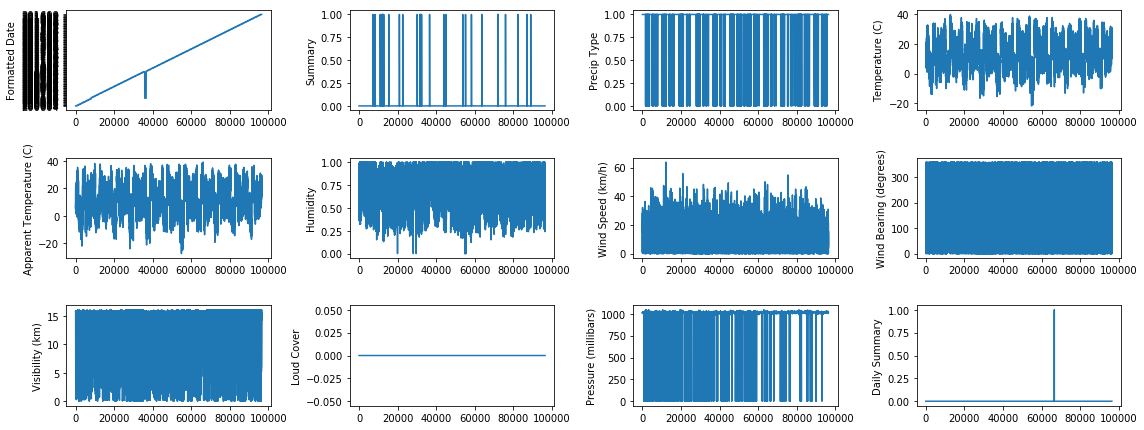

In [4]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(6, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()

### Preliminary Observations
1. Observation of temperature in celsius sports of entries in the range of 40 to -20 degrees. Temperature has been recorded slightly more above 0 degrees overall

2. Apparent temperature looks similar to temerature observations as well

3. Humidity falls mostly under 1.00 to 0.25 values

4. Most common wind speed has been observed between 0 to 40 kms / hr

5. Similar to wind bearings observations, visibility also is predicted to fall uniformly btween 0 to 15 kms

6. Pressure ranges from 0 to 1000 milibars in the first 80% of the entries. Afterwards it mostly sticks with 1000 millibars

7. Summary comments with entries between 0 125 were more frequntly used than others

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107C9510>,
      dtype=object)

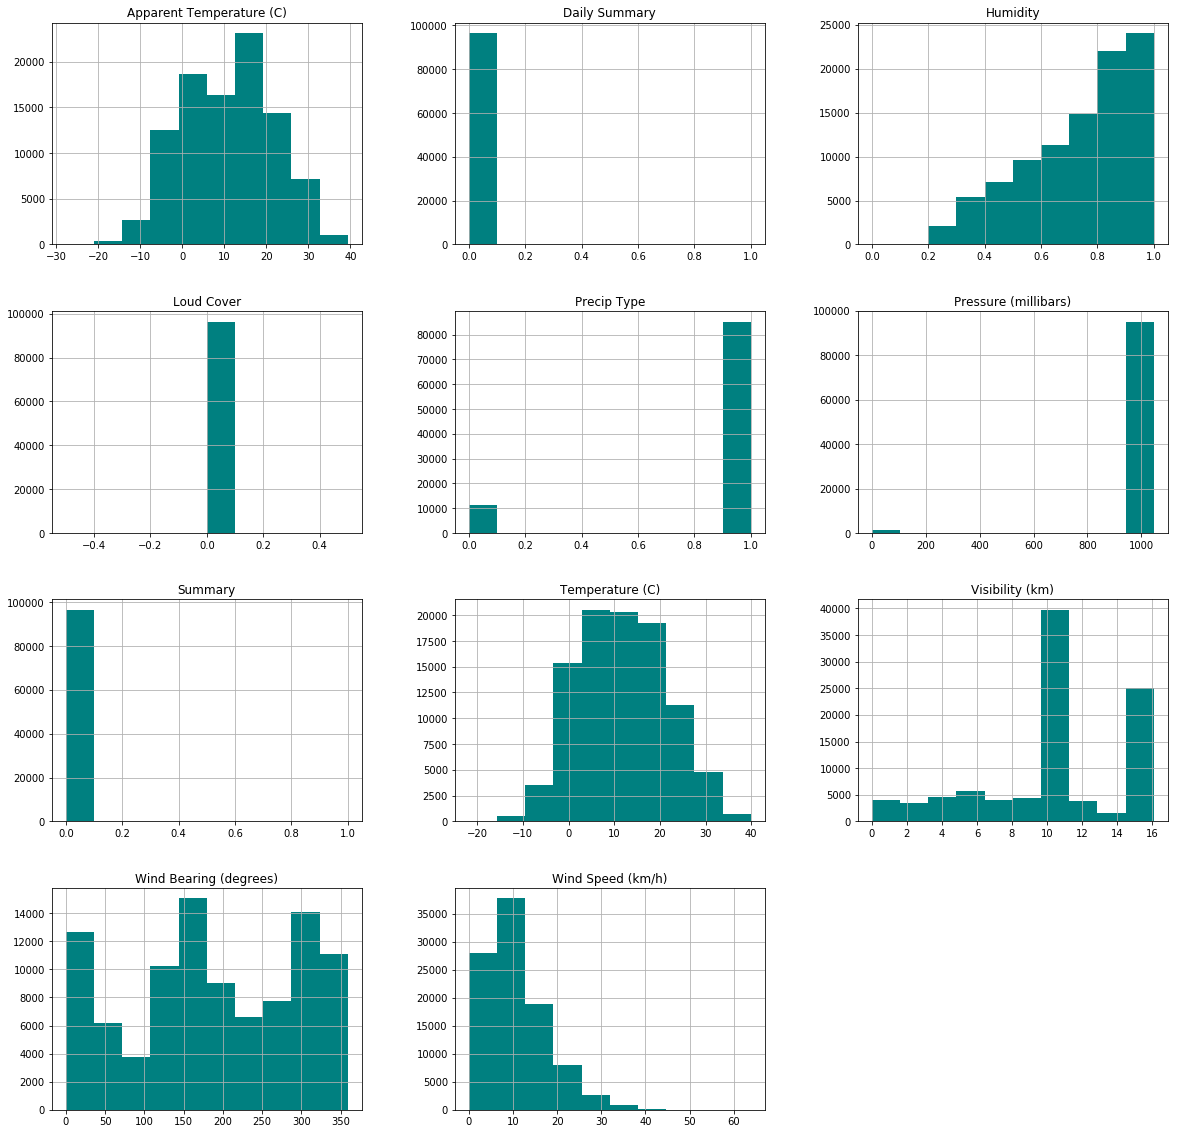

In [5]:
df.hist(figsize=(20,20), color='teal')

Certain features like __Daily Summary__, __Summary__ and __Loud Cover__, do not seem to have values relevant for regression analysis. Let us go ahead and drop these columns

In [6]:
df = df.drop(['Daily Summary', 'Summary','Loud Cover'], axis=1)

In [7]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,0.320729,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Some columns seem to have zero or missing values. Let us replace them with medians

In [8]:
def stabilize_min(median, x):
    if x==0:
        x = x + median
    return x

In [9]:
pressure_median = df['Pressure (millibars)'].median()
humidity_median = df['Humidity'].median()
wind_speed_median = df['Wind Speed (km/h)'].median()
wind_bearings_median = df['Wind Bearing (degrees)'].median()
visibility_median = df['Visibility (km)'].median()


df["Pressure (millibars)"] = df.apply(lambda row:stabilize_min(pressure_median, row["Pressure (millibars)"]) , axis = 1)
df["Humidity"] = df.apply(lambda row:stabilize_min(humidity_median, row["Humidity"]) , axis = 1)
df["Wind Speed (km/h)"] = df.apply(lambda row:stabilize_min(wind_speed_median, row["Wind Speed (km/h)"]) , axis = 1)
df["Wind Bearing (degrees)"] = df.apply(lambda row:stabilize_min(wind_bearings_median, row["Wind Bearing (degrees)"]) , axis = 1)
df["Visibility (km)"] = df.apply(lambda row:stabilize_min(visibility_median, row["Visibility (km)"]) , axis = 1)

In [10]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,11.932678,10.855029,0.735077,10.944651,191.734295,10.394196,1016.809278
std,0.320729,9.551546,10.696847,0.195158,6.798348,103.389436,4.131900,7.726359
min,0.000000,-21.822222,-27.716667,0.120000,0.032200,1.000000,0.016100,973.780000
25%,1.000000,4.688889,2.311111,0.600000,6.118000,128.000000,8.468600,1012.200000
50%,1.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,1.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1671F830>,
      dtype=object)

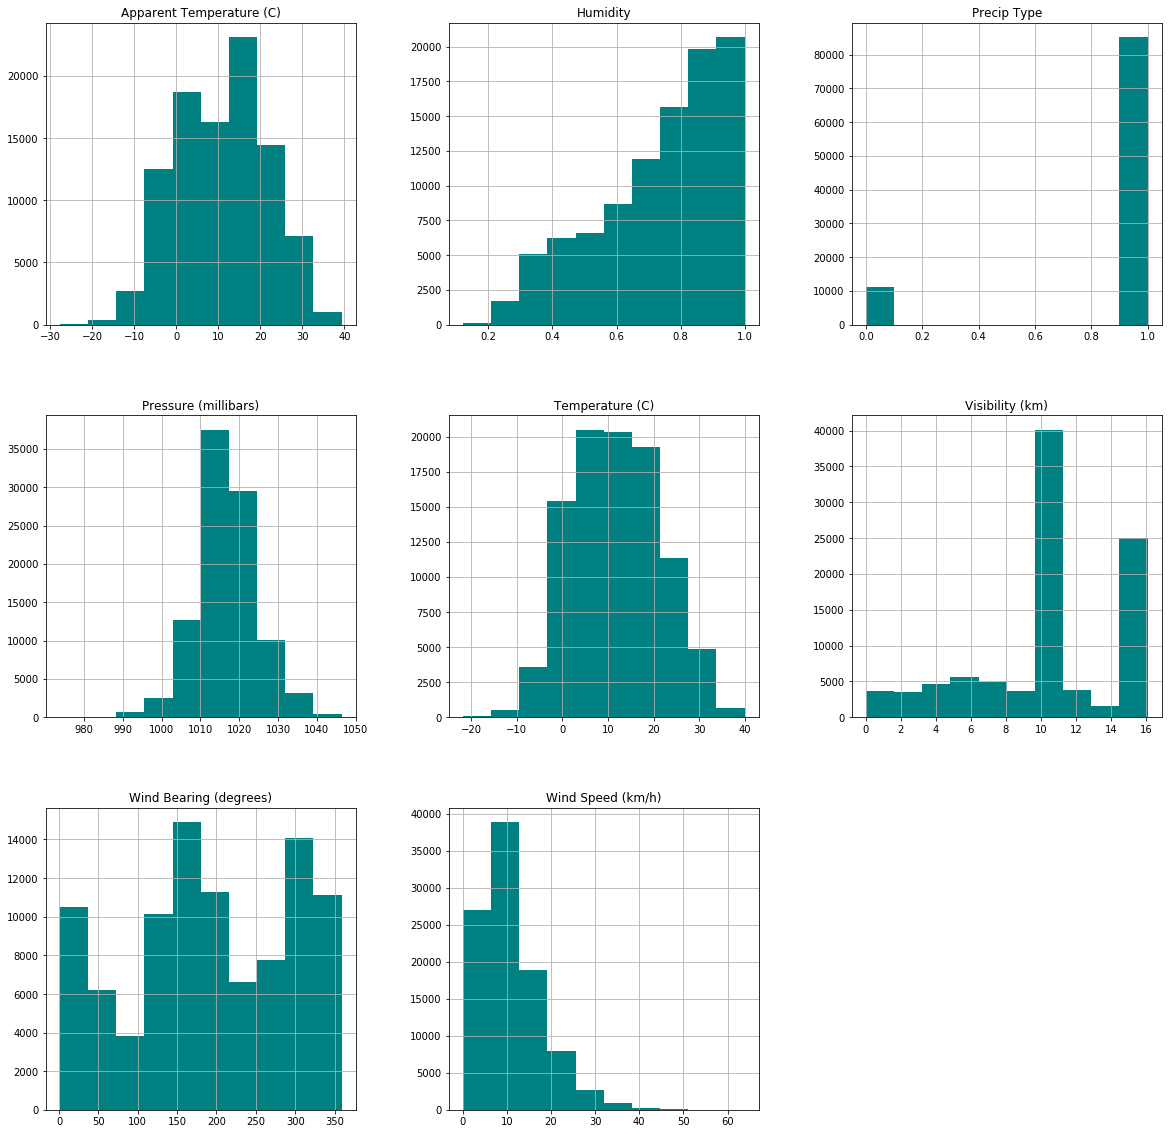

In [11]:
df.hist(figsize=(20,20), color='teal')

### Preliminary Observation
Wind bearing is uniformly distributed between 0 to 360 degrees for the given span of ten years <br>

Visibility charts are more sharp here, we can see that 10-12 kms is the most frequent visibility distance recorded. 

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,0.553873,0.555889,-0.231064,0.063982,0.038929,0.307787,-0.295888
Temperature (C),0.553873,1.000000,0.992629,-0.635706,0.006619,0.026291,0.391215,-0.308120
Apparent Temperature (C),0.555889,0.992629,1.000000,-0.605969,-0.057844,0.027670,0.379989,-0.286078
Humidity,-0.231064,-0.635706,-0.605969,1.000000,-0.217611,0.013623,-0.372198,0.040455
Wind Speed (km/h),0.063982,0.006619,-0.057844,-0.217611,1.000000,0.071963,0.100828,-0.247393
Wind Bearing (degrees),0.038929,0.026291,0.027670,0.013623,0.071963,1.000000,0.046622,-0.067459
Visibility (km),0.307787,0.391215,0.379989,-0.372198,0.100828,0.046622,1.000000,-0.159376
Pressure (millibars),-0.295888,-0.308120,-0.286078,0.040455,-0.247393,-0.067459,-0.159376,1.000000


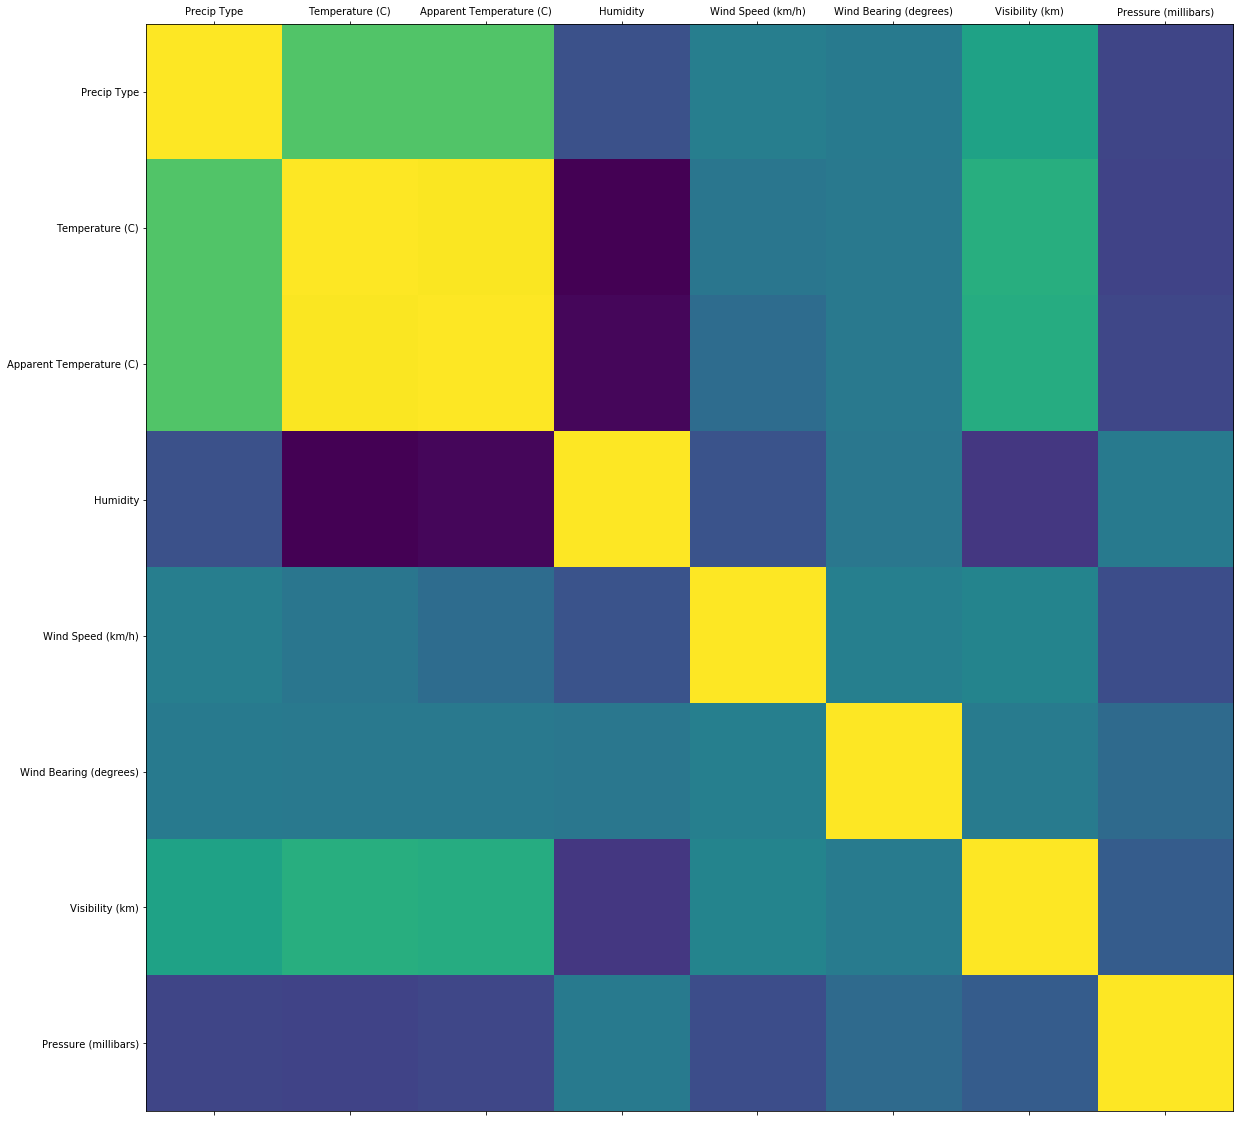

In [12]:
size=20
correlation = df.corr()
correlation.style.background_gradient().set_precision(2)
correlation.style.format("{:.2%}")

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(correlation,interpolation="nearest")

plt.xticks(range(len(correlation.columns)), correlation.columns);
plt.yticks(range(len(correlation.columns)), correlation.columns);

correlation

Apparent Temperature is our target feature. The correlation graph suggests that Temperatre and Apparent temperature have high relation, So does wind speed and wind bearings. Let us use all these features to predict the apparent temperature

In [13]:
df.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,200604,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,200604,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,200604,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,200604,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,200604,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [14]:
T = df.iloc[:, 3]
T = np.asarray(T).reshape((T.shape[0],1))
print(T.shape)

(96453, 1)


Let us pick rest of the database for feature based regression, by dropping target column from it, to avoid unbiased predictions.

In [15]:
X = df.drop(['Apparent Temperature (C)'], axis=1)
N = X.shape[0]
X.head()

,Formatted Date,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,200604,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,200604,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,200604,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,200604,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,200604,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51


### Partitioning the data

In [16]:
""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

# Method

## Review

__Base Model__ uses ABC and abstractmethod libraries for creating abstract skeleton code for future implementations, known as super class. This base model contains abstract methods of __train__ and __use__, which are later implemented in LinearRegression and LMS classes. Hence common functionalities are described in this super class. <br>
Linear Model is first sub class of Base model. It implements __init__ method to instantiate w (bias) and has a method for adding one bias in matrices called as __add_ones__ . Another method __check_matrix__ is defined for ensuring that 2D arrays are passed to avoid errors in computations later.

### Super Class Definition

In [17]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

## Explanation of Codes
### Least Squares

In Least Square Model we measure the distance between actual data points and predicted trend line, square it and add these all up for improvement in next prediction. The final line would have minimum distance from most data points, and hence achieve the best possible fit.

__<center>w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>t</center>__

#### Implementation:
__Train :__ This method generates w by computing least squares from features and target data. Normally a partitioned data meant for training the model is passed as parameters here. Also, dimensions of the array are checked and made sure that a 2d array is being passed using add_ones method, which was implemented in its super class Linear Model . <br>

__Use :__ The w obtained from above train method is used for predicting values of target data, based on new / test data with same features. Here, test data is passed which is used in obtaining a dot product with w, which is our predicted data with minimal distance from actual target data.

In [18]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return X1 @ self.w

### Least Mean Squares

Least Mean Squares is used for incremental learning in a linear regression model. In this model, data is fed gradually which allows overall better adaptability for w. Such a model is ideal for computations with huge dataset, where waiting for an entire dataset to be processed is not an option. <br>This provides real time predictions. In our implementation, each data point is fed one by one through looping to a stp function, which reuses w from previous iteration and calculates better values in each passing iteration, to the point of possible convergence in predicted values and actual values.

#### Implementation:

__init() :__ Initialization method used to update the global variable alpha, passed as a parameter while intantiating LMS class. <br>

__Train() :__ Train method implements a for loop to compute w through train_step function gradually. It accepts features (X) and target column (T) as parameters.
<br>

__Train_step() :__ It first ensures that feature data (X) being passed is indeed a 2D array. If not then, it modifies X, making it compatible for future steps. The weight vector is initialized here if it is found to be empty, else the existing value is used for further computations (helping in convergence of error rate). Using a predefined learning rate alpha, the weight w is updated step by step. <br>

__Use() :__ This method utilizes the above obtained final weight value and gives out its dot product with feature values (X). Thus obtained array, is the predicted line with minimal error rate. But before these computations we add one bias to feature values (X) using add_ones.

In [19]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
                
        for i in range(X.shape[0]):
            self.train_step(X[i],T[i])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))

        self.w -= self.alpha * ((self.w.T @ x) -t) * x
        return self.w
    
    
    # apply the current model to data X
    def use(self, X):
        
        if len(X.T.shape) != 2:
            X = np.insert(X,0,1).reshape(-1,1)
        X1 = self.add_ones(X)
        y = X1 @ self.w        

        return y        

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


## Description of Codes

### Least Square Regression

We have partitioned the data in a 80:20 ratio for validation testing of the linear regression model of least squares. The X and T of training model is fed to the train step of linear regression model. Finally the test part of X is used for predicting the T (Apparent Temperature in our case) of dataset.

In [20]:
Xs,Ts = partition(X,pd.DataFrame(T))
Ts[0] = np.asarray(Ts[0])
Ts[1] = np.asarray(Ts[1])
Xs[0] = Xs[0].astype('float64')
Xs[1] = Xs[1].astype('float64')
# Xs[1] = np.asmatrix(Xs[1]).astype('float64')

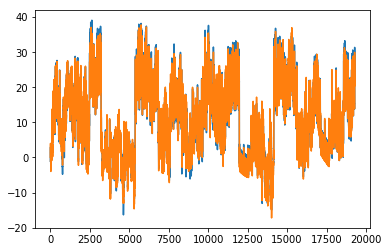

In [21]:
plt.clf()
lr = LinearRegress()

lr.train(Xs[0],Ts[0])

plt.plot(lr.use(Xs[1]))
plt.plot(Ts[1])

#### Preliminary Observations:

Upon plotting both actual values and predicted values, we can see that the model is working very well on our data. It has succesfully predicted similar values of temperature between 40 degrees to -20 degrees celsius.

### Least Mean Square Regression

We initilize th LMS model by giving 0.2 value for alpha initialization. The X and T of training model is fed to the train step of LMS model. After online training, the test part of X is used for predicting the T (Apparent Temperature in our case) of dataset.

In [22]:
Xs[0] = np.hstack((np.ones((Xs[0].shape[0], 1)), Xs[0]))
Xs[1] = np.hstack((np.ones((Xs[1].shape[0], 1)), Xs[1]))

c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


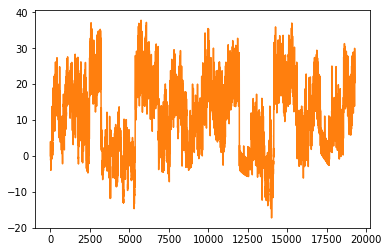

In [23]:
plt.clf()
lms = LMS(0.2)
lms.train(Xs[0], Ts[0])

plt.plot(lms.use(Xs[1]))
plt.plot(Ts[1])

#### Preliminary Observations:

Upon plotting both actual values and predicted values, we can see that the model is working even better on our data. It has succesfully predicted exact values of temperature between 40 degrees to -20 degrees celsius, since the overlapping values are hardly visible on this above plotted scale.

#### LMS Online Learning

Here we show real time plotting of predicted line along with the Root Mean Square Error and Current Estimation.
<br>
Note: For the sake of time limit, computing the RMSE for 1000 iterations. But more iterations can also be achieved by increasing the range to desired value below total number of rows in dataset.

In [24]:
import IPython.display as ipd  # for display and clear_output

def lms_without_step(alpha, X1i, T):
    plt.clf()

    # read one by one and update weights 
    w_lms = np.zeros(X1i.shape[1]).reshape(X1i.shape[1],1)

    fig = plt.figure(figsize=(16,8))

    errs = []
    for i in range(1000):

        w_lms -= alpha * (((w_lms.T @ X1i[i]) -T[i]) * X1i[i, None].T)
        Y_lms = X1i @ w_lms 

        errs.append( np.sqrt(np.mean(T - Y_lms)**2) )

        plt.clf()
        plt.subplot(1,2, 1)
        plt.plot(errs)
        plt.ylabel("RMSE")

        plt.subplot(1,2, 2)
        plt.plot(T[:i])
        plt.plot(Y_lms[:i])
        plt.ylabel("Current Estimation")


        ipd.clear_output(wait=True)
        ipd.display(fig)
    ipd.clear_output(wait=True)
    print(Y_lms)
    return Y_lms

In [25]:
X.describe()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,11.932678,0.735077,10.944651,191.734295,10.394196,1016.809278
std,0.320729,9.551546,0.195158,6.798348,103.389436,4.131900,7.726359
min,0.000000,-21.822222,0.120000,0.032200,1.000000,0.016100,973.780000
25%,1.000000,4.688889,0.600000,6.118000,128.000000,8.468600,1012.200000
50%,1.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,1.000000,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,1.000000,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


We can observe lot of deviation in minimum and maximum values of many columns. Let us apply a __MinMaxScaling__ tobring them all in relative ratios.

In [26]:
X1i = df.drop(['Formatted Date'], axis=1)

In [27]:
def minMaxScale(ds, minVal,maxVal):
    
    for i in range(ds.columns.size):        
        X_std = (ds.iloc[:,i] - ds.iloc[:,i].min(axis=0)) / (ds.iloc[:,i].max(axis=0) - ds.iloc[:,i].min(axis=0))
        ds.iloc[:,i] = X_std * (maxVal - minVal) + minVal

In [28]:
minMaxScale(X1i, 0.00, 1.00)

In [29]:
X1i.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.883581,0.546835,0.575172,0.698951,0.170987,0.532777,0.645247,0.592690
std,0.320729,0.154737,0.159509,0.221771,0.106523,0.288797,0.256897,0.106424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.429484,0.447767,0.545455,0.095358,0.354749,0.525526,0.529201
50%,1.000000,0.547925,0.592246,0.750000,0.155651,0.500000,0.623624,0.587741
75%,1.000000,0.658717,0.694226,0.875000,0.220989,0.807263,0.919920,0.651653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X1i.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1.0,0.506975,0.523486,0.875000,0.220737,0.698324,0.982983,0.569559
1,1.0,0.505085,0.521084,0.840909,0.223007,0.720670,0.982983,0.576446
2,1.0,0.505445,0.553144,0.875000,0.061049,0.567039,0.928929,0.580716
3,1.0,0.487805,0.501947,0.806818,0.220484,0.748603,0.982983,0.587190
4,1.0,0.495365,0.517356,0.806818,0.172553,0.720670,0.982983,0.588567


In [31]:
T = X1i.iloc[:, 2]
T = np.asarray(T).reshape((T.shape[0],1))
T.shape

(96453, 1)

In [32]:
X1i = X1i.drop(['Apparent Temperature (C)'], axis=1)

In [33]:
X1i = np.hstack((np.ones((X1i.shape[0], 1)), X1i))
X1i = X1i.astype('float64')

[[0.74041708]
 [0.74313459]
 [0.72000367]
 ...
 [0.75380738]
 [0.7513675 ]
 [0.7432789 ]]


array([[0.74041708],
       [0.74313459],
       [0.72000367],
       ...,
       [0.75380738],
       [0.7513675 ],
       [0.7432789 ]])

<Figure size 432x288 with 0 Axes>

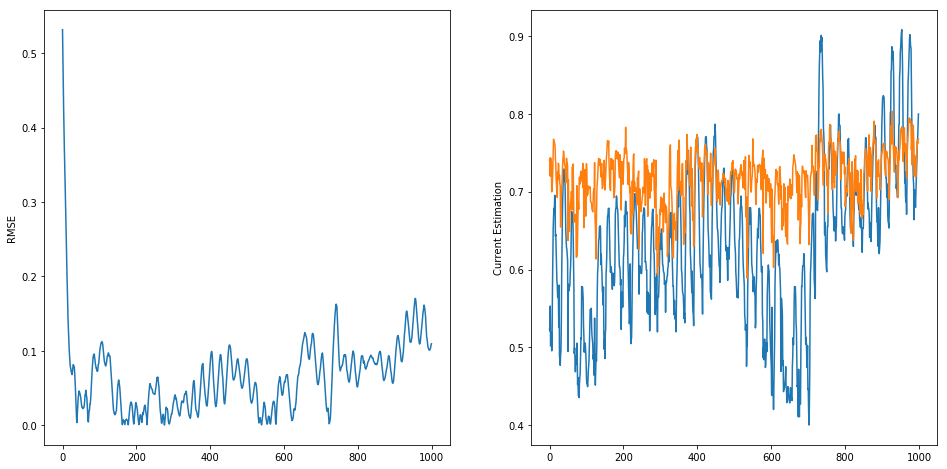

In [34]:
lms_without_step(0.02,X1i,T)

## Analysis

1. The RMSE values gradually decrease, there by converging after training for certain iterations.
2. According to current estimation graph, the model is predicting fairly good values against target data

## Comparison

Both the algorithms upon above implementations appear to be efficient for regression training of model. Least Square model is calculated by finding the square of error between data points. <br><br>
Whereas, in Least Mean Squares we get to decide upon how much to deviate from current value of w, using alpha, the learning rate. This allows us for choosing between exploration and exploitation. <br><br>
Moreover, LS is a batch learning model and LMS is ideal for online learning. It allows us to feed it data in gradual steps and the model improvises its prediction line accordingly, with help of the step functionality.

# Conclusions

1. We conclude that LMS model has better prediction of best fitting line than that of LS model. <br>

2. Choosing the right kind of dataset suitable for regression analysis is very important. <br>

3. I faced challenges in implementing right type of normalization / scaling for my dataset, to better suit the models training techniques. <br>

4. This assignment taught us how to implement a regression classifier from scratch without using any predefined libraries.

# References

1. Swaminathan, Saishruthi. “Linear Regression - Detailed View – Towards Data Science.” Towards Data Science, Towards Data Science, 26 Feb. 2018, https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86.
2. Pedregosa, F, et al. “Sklearn.preprocessing.MinMaxScaler¶.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, 2011, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.
3. Hunter, John, et al. “Matplotlib Examples.” Matplotlib: Python Plotting - Matplotlib 2.2.3 Documentation, https://matplotlib.org/gallery/index.html.
4. Budincsevity, Norbert. “Weather in Szeged 2006-2016.” Kaggle, 8 Jan. 2017, www.kaggle.com/budincsevity/szeged-weather.
5. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: OReilly Media.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test
## (For correct implementation)
After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [35]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
